In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mnist_784_csv.csv')

In [3]:
x_data = data.iloc[:, 1:].values.astype('float32') / 255.

In [4]:
x_train = x_data[:60000]
x_test = x_data[60000:]

In [5]:
# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [7]:
input_dim = 784  # 28x28 images flattened
encoding_dim = 64 

input_img = Input(shape=(input_dim,))

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

In [8]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [9]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 0.3386 - val_loss: 0.1874
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1787 - val_loss: 0.1585
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1553 - val_loss: 0.1427
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1414 - val_loss: 0.1336
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1329 - val_loss: 0.1279
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1279 - val_loss: 0.1241
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1239 - val_loss: 0.1216
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1217 - val_loss: 0.1198
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1197 - val_loss: 0.1180
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1180 - val_loss: 0.1169


In [10]:
denoised_imgs = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


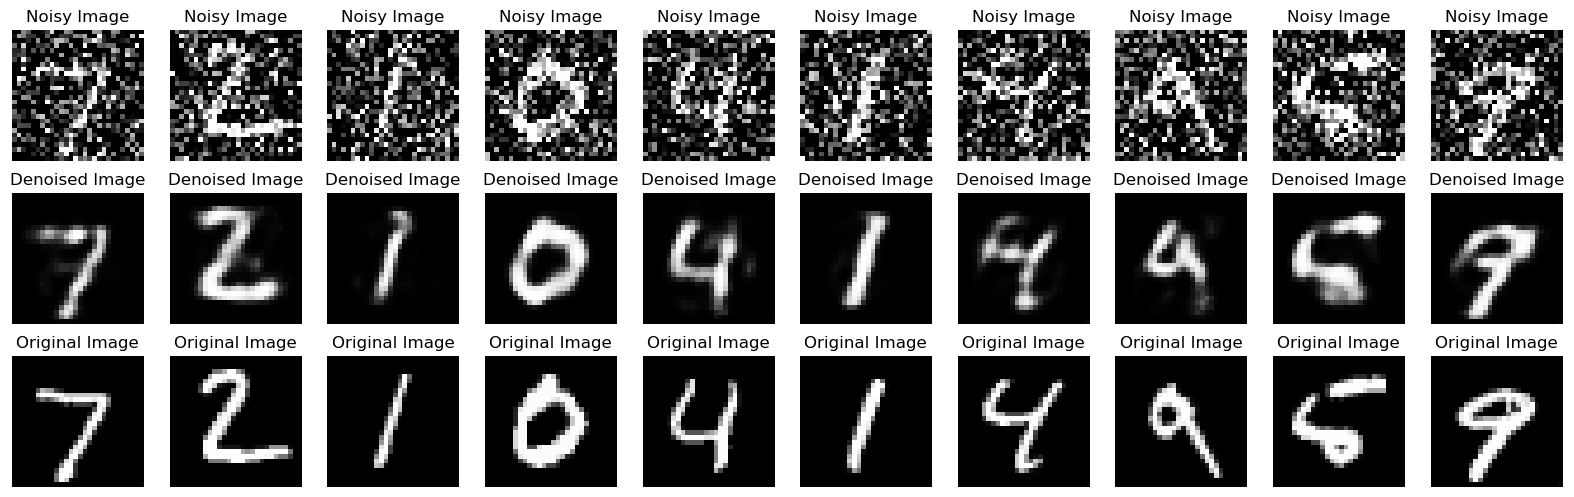

In [11]:
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

plt.show()

In [ ]:
#Image denoising with autoencoders is a technique used to clean noisy images by reconstructing their original.
#np.random.normal(loc=0.0, scale=1.0, size=images.shape) generates random values from a normal distribution with a mean (loc) of 0.0 and a standard deviation (scale) of 1.0. 
    #These random values match the shape of the input images.

#MaxPooling2D= This helps compress the feature maps, making the model more efficient and focusing on the most prominent features.Used in the encoder part of the network (initial layers) to reduce the size of the feature maps. By retaining only the most important information,
#UpSampling2D=xpanding the spatial dimensions by a fixed factor (e.g., 2x2) without adding new information,Used in the decoder part of the model (final layers) to progressively increase the spatial resolution, reconstructing the image shape to match the input dimensions.

